<a href="https://colab.research.google.com/github/shivamjha-9/e-wastecfy-ml/blob/main/week1report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Install TensorFlow package
!pip install tensorflow

In [2]:
import tensorflow as tf  # Core TensorFlow library

from tensorflow.keras import layers, models, optimizers, callbacks  # Layers, model creation, optimizers, and training callbacks

from tensorflow.keras.models import Sequential, load_model  # For sequential model architecture and loading saved models

from tensorflow.keras.applications import EfficientNetV2B0  # Pretrained EfficientNetV2B0 model for transfer learning

from tensorflow.keras.applications.efficientnet import preprocess_input  # Preprocessing function specific to EfficientNet

import numpy as np  # Numerical operations and array handling

import matplotlib.pyplot as plt  # Plotting graphs and images

import seaborn as sns  # Plotting graphs and images

from sklearn.metrics import confusion_matrix, classification_report  # Evaluation metrics for classification models

import gradio as gr  # Web interface library to deploy and test ML models

from PIL import Image  # For image file loading and basic image operations

In [11]:
from zipfile import ZipFile

zip_path = zip_path = zip_path = '/content/E-Waste classification dataset.zip'
with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall('/content/e-waste-data')


In [28]:
import os

# Find all folders inside /content
for root, dirs, files in os.walk("/content"):
    for dirname in dirs:
        if dirname.lower() == "train":
            print("✅ Found train folder at:", os.path.join(root, dirname))


✅ Found train folder at: /content/e-waste-data/modified-dataset/train


In [29]:
trainpath = r'/content/e-waste-data/E-Waste classification dataset/E waste data/modified-dataset/train'
validpath = r'/content/e-waste-data/E-Waste classification dataset/E waste data/modified-dataset/val'
testpath  = r'/content/e-waste-data/E-Waste classification dataset/E waste data/modified-dataset/test'


In [30]:
!mv "/content/e-waste-data/E-Waste classification dataset" "/content/e-waste-data/classification"


mv: cannot stat '/content/e-waste-data/E-Waste classification dataset': No such file or directory


In [31]:
import os

# Find paths of train, val, and test folders
for root, dirs, files in os.walk("/content"):
    for name in dirs:
        if name.lower() in ['train', 'val', 'test']:
            print(f"{name} folder found at: {os.path.join(root, name)}")


train folder found at: /content/e-waste-data/modified-dataset/train
test folder found at: /content/e-waste-data/modified-dataset/test
val folder found at: /content/e-waste-data/modified-dataset/val


In [32]:
trainpath = '/content/e-waste-data/modified-dataset/train'
validpath = '/content/e-waste-data/modified-dataset/val'
testpath  = '/content/e-waste-data/modified-dataset/test'


In [33]:
import tensorflow as tf

train_ds = tf.keras.utils.image_dataset_from_directory(
    directory=trainpath,
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32
)

val_ds = tf.keras.utils.image_dataset_from_directory(
    directory=validpath,
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32
)

test_ds = tf.keras.utils.image_dataset_from_directory(
    directory=testpath,
    labels='inferred',
    label_mode='categorical',
    image_size=(224, 224),
    batch_size=32,
    shuffle=False  # for evaluation
)


Found 2400 files belonging to 10 classes.
Found 300 files belonging to 10 classes.
Found 300 files belonging to 10 classes.


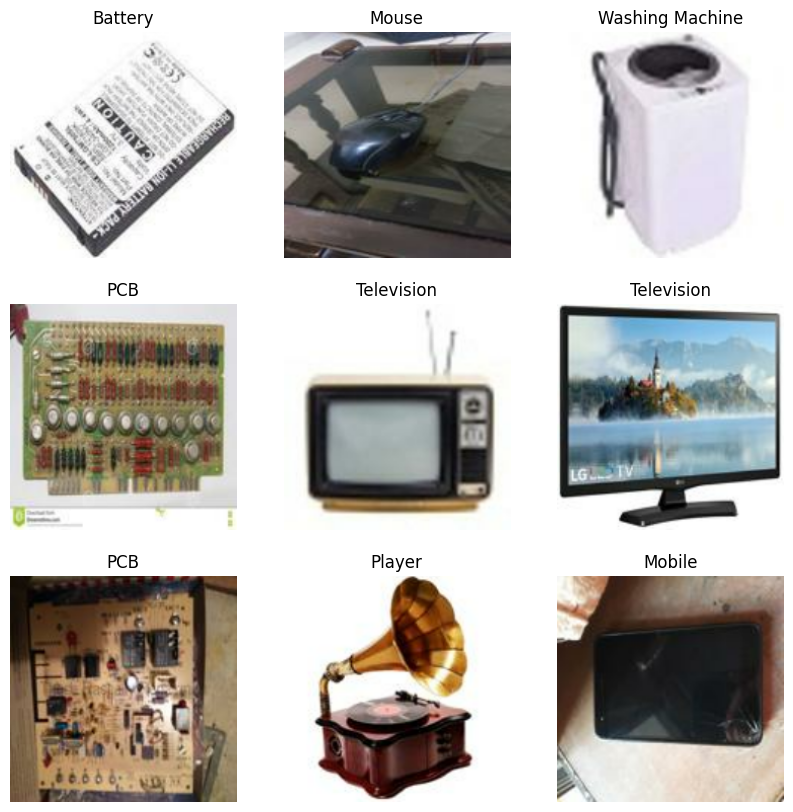

In [37]:
import matplotlib.pyplot as plt
class_names = train_ds.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[tf.argmax(labels[i]).numpy()])
        plt.axis("off")

In [38]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)
